In [1]:
%pip install numpy
%pip install pandas
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [4]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [9]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [10]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [14]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [15]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
90205,62915.0,1.317623,0.098919,0.239287,0.003308,-0.377815,-0.897914,0.010482,-0.232877,0.132764,...,-0.126944,-0.328572,-0.003866,0.107176,0.308459,0.948797,-0.079081,0.002035,3.00,0
34306,37604.0,1.465747,-0.335047,-0.897935,-1.017714,0.488670,0.456553,-0.140576,-0.037683,-1.399461,...,-0.427494,-0.690289,-0.219944,-1.662139,0.660609,0.858872,-0.047970,-0.030057,4.39,0
225742,144377.0,2.063263,-0.063569,-1.064633,0.420042,-0.167820,-1.224861,0.168187,-0.322369,0.575650,...,-0.291859,-0.715697,0.344860,0.040003,-0.306978,0.196245,-0.072045,-0.060495,0.89,0
117680,74764.0,-2.979096,-2.524930,0.556813,0.685149,1.321878,-0.392852,0.450090,-0.010026,-0.501797,...,0.110451,0.559404,-0.049481,-0.173774,-0.502766,0.354121,0.487340,-0.032707,457.38,0
92848,64134.0,-1.692767,-0.083373,1.355518,0.707224,-0.220037,-0.084923,0.236512,0.653425,-0.864350,...,0.559975,0.956320,0.165956,0.219586,0.047894,-0.294530,-0.022135,-0.051596,168.33,0


In [17]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [19]:
%pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Axes: ylabel='count'>

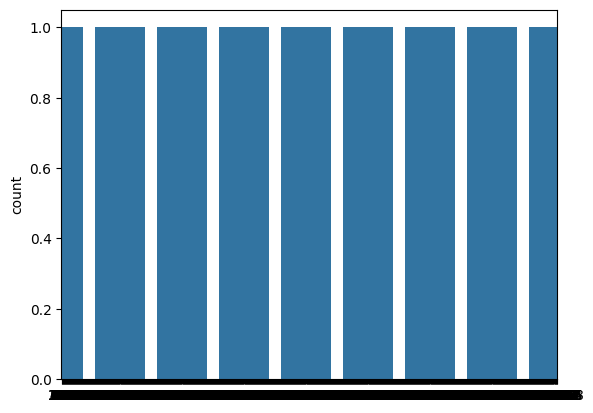

In [20]:
sns.countplot(new_dataset['Class'])

In [21]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94505.471545,-0.044250,-0.047856,0.111572,-0.158965,0.006369,-0.006186,0.052283,0.040133,-0.040312,...,0.015369,0.025210,-0.020449,0.008488,0.009807,0.018067,0.057523,-0.000153,-0.006472,98.279065
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [22]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [23]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
90205    62915.0  1.317623  0.098919  0.239287  0.003308 -0.377815 -0.897914   
34306    37604.0  1.465747 -0.335047 -0.897935 -1.017714  0.488670  0.456553   
225742  144377.0  2.063263 -0.063569 -1.064633  0.420042 -0.167820 -1.224861   
117680   74764.0 -2.979096 -2.524930  0.556813  0.685149  1.321878 -0.392852   
92848    64134.0 -1.692767 -0.083373  1.355518  0.707224 -0.220037 -0.084923   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [24]:
print(Y)

90205     0
34306     0
225742    0
117680    0
92848     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [25]:
normal = new_dataset[new_dataset['Class']==0]
fraud = new_dataset[new_dataset['Class']==1]

In [26]:
normal.shape

(492, 31)

In [27]:
fraud.shape

(492, 31)

In [28]:
normal_sample=normal.sample(n=473)

In [29]:
normal_sample.shape

(473, 31)

In [30]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [31]:
new_data['Class'].value_counts()

Class
1    492
0    473
Name: count, dtype: int64

In [32]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,32872.0,-0.775874,0.583451,1.195177,-0.415169,0.430669,-0.686968,0.773140,-0.072090,-0.311690,...,0.279406,0.730238,-0.140122,0.110316,-0.229251,0.302339,-0.055881,0.179626,35.00,0
1,58565.0,1.022537,-0.226860,0.910276,1.232480,-0.417737,0.996301,-0.638497,0.490325,0.721525,...,0.060061,0.457591,-0.063215,-0.268713,0.469755,-0.233392,0.081449,0.010199,16.24,0
2,72696.0,1.536354,-0.843934,-0.230985,-1.528782,-0.809101,-0.751063,-0.468231,-0.355013,-2.212395,...,-0.590489,-1.396224,0.067120,-0.503198,0.367355,-0.482497,0.008431,0.018264,45.70,0
3,133849.0,-1.034502,0.277387,0.897339,0.950505,1.355533,-1.220127,0.553202,-0.209881,-1.539728,...,0.270383,0.548255,-0.154604,0.170761,-0.462825,2.324891,-0.232188,0.236435,13.58,0
4,147667.0,-0.861664,0.246767,1.300737,-0.593803,0.278909,-0.045076,0.273188,-0.024876,0.388345,...,0.290633,1.073647,0.009885,0.827868,-0.308345,0.539866,-0.076914,0.178502,29.90,0


In [33]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\Karthik\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred1 = log.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred1)

0.9119170984455959

In [39]:
accuracy_score(y_test,y_pred1)

0.9119170984455959

In [40]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [41]:
precision_score(y_test,y_pred1)

0.9479166666666666

In [42]:
precision_score(y_test,y_pred1)

0.9479166666666666

In [43]:
recall_score(y_test,y_pred1)

0.883495145631068

In [44]:
recall_score(y_test,y_pred1)

0.883495145631068

In [45]:
f1_score(y_test,y_pred1)

0.914572864321608

In [46]:
f1_score(y_test,y_pred1)

0.914572864321608

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred2 = dt.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred2)

0.8911917098445595

In [50]:
precision_score(y_test,y_pred2)

0.8796296296296297

In [51]:
recall_score(y_test,y_pred2)

0.9223300970873787

In [52]:
f1_score(y_test,y_pred2)

0.9004739336492891

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
y_pred3 = rf.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred3)

0.927461139896373

In [56]:
precision_score(y_test,y_pred3)

0.968421052631579

In [57]:
recall_score(y_test,y_pred3)

0.8932038834951457

In [58]:
f1_score(y_test,y_pred3)

0.9292929292929293

In [59]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [60]:
final_data

,Models,ACC
0,LR,91.191710
1,DT,89.119171
2,RF,92.746114


<Axes: xlabel='Models', ylabel='ACC'>

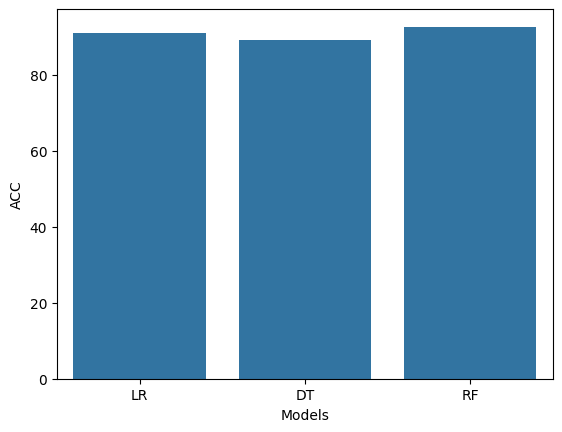

In [61]:
import seaborn as sns
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

In [62]:
X = new_dataset.drop('Class',axis=1)
y = new_dataset['Class']

In [63]:
X.shape

(984, 30)

In [64]:
y.shape

(984,)

In [65]:
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [66]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [67]:
y_res.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

In [69]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\Karthik\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
y_pred1 = log.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred1)

0.934010152284264

In [72]:
precision_score(y_test,y_pred1)

0.9473684210526315

In [73]:
recall_score(y_test,y_pred1)

0.9183673469387755

In [74]:
f1_score(y_test,y_pred1)

0.9326424870466321

In [75]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
y_pred2 = dt.predict(X_test)

In [77]:
accuracy_score(y_test,y_pred2)

0.8984771573604061

In [78]:
precision_score(y_test,y_pred2)

0.90625

In [79]:
recall_score(y_test,y_pred2)

0.8877551020408163

In [80]:
f1_score(y_test,y_pred2)

0.8969072164948454

In [81]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [82]:
y_pred3 = rf.predict(X_test)

In [83]:
accuracy_score(y_test,y_pred3)

0.9289340101522843

In [84]:
precision_score(y_test,y_pred3)

0.9772727272727273

In [85]:
recall_score(y_test,y_pred3)

0.8775510204081632

In [86]:
f1_score(y_test,y_pred3)

0.9247311827956989

In [87]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [88]:
final_data

,Models,ACC
0,LR,93.401015
1,DT,89.847716
2,RF,92.893401


<Axes: xlabel='Models', ylabel='ACC'>

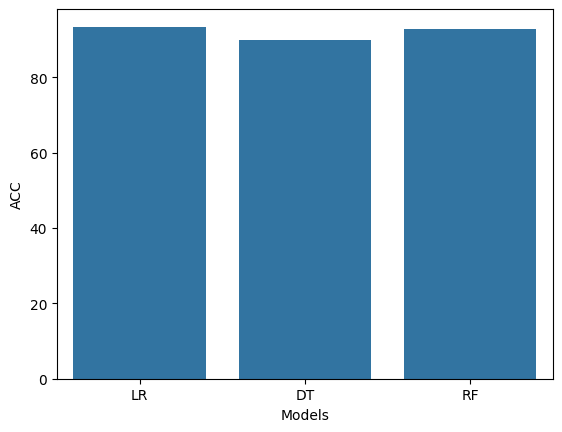

In [89]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

In [90]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [91]:
import joblib

In [92]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [93]:
model = joblib.load("credit_card_model")

In [94]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\Karthik\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [95]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


In [96]:
import tkinter as tk
from tkinter import ttk, messagebox
import joblib
import os
import numpy as np
from tkinter.font import Font


def load_model():
    model_path = "credit_card_model"
    if os.path.exists(model_path):
        return joblib.load(model_path)
    else:
        raise FileNotFoundError(f"Model file '{model_path}' not found.")


def show_entry_fields():
    try:
        values = [
            float(entry.get().strip()) for entry in entry_fields if entry.get().strip()
        ]
        if len(values) != 30:
            raise ValueError("Please fill in all 30 fields.")

        model = load_model()
        input_data = np.array(values).reshape(1, -1)  # Use all 30 fields for prediction
        y_pred = model.predict(input_data)

        result = "Normal Transaction" if y_pred[0] == 0 else "Fraudulent Transaction"
        color = "#4CAF50" if y_pred[0] == 0 else "#F44336"

        result_label.config(
            text=f"Prediction: {result}", foreground="white", background=color
        )
        result_label.pack(pady=20, fill=tk.X, padx=20)
    except ValueError as e:
        messagebox.showerror("Input Error", str(e))
    except FileNotFoundError as e:
        messagebox.showerror("Model Error", str(e))
    except Exception as e:
        messagebox.showerror(
            "Unexpected Error", f"An unexpected error occurred: {str(e)}"
        )


def reset_fields():
    for entry in entry_fields:
        entry.delete(0, tk.END)
    entry_fields[0].focus()
    result_label.pack_forget()


def on_enter(event):
    event.widget.config(background="#E1F5FE")


def on_leave(event):
    event.widget.config(background="white")


def load_sample_data():
    sample_data = [
        -1.3598071336738,
        -0.0727811733098497,
        2.53634673796914,
        1.37815522427443,
        -0.338320769942518,
        0.462387777762292,
        0.239598554061257,
        0.0986979012610507,
        0.363786969611213,
        0.0907941719789316,
        -0.551599533260813,
        -0.617800855762348,
        -0.991389847235408,
        -0.311169353699879,
        1.46817697209427,
        -0.470400525259478,
        0.207971241929242,
        0.0257905801985591,
        0.403992960255733,
        0.251412098239705,
        -0.018306777944153,
        0.277837575558899,
        -0.110473910188767,
        0.0669280749146731,
        0.128539358273528,
        -0.189114843888824,
        0.133558376740387,
        -0.0210530534538215,
        149.62,
        0,
    ]
    for entry, value in zip(entry_fields, sample_data):
        entry.delete(0, tk.END)
        entry.insert(0, str(value))


root = tk.Tk()
root.title("Credit Card Fraud Detection System")
root.geometry("800x900")
root.configure(bg="#F0F0F0")

style = ttk.Style(root)
style.theme_use("clam")

title_font = Font(family="Helvetica", size=18, weight="bold")
label_font = Font(family="Helvetica", size=10)
entry_font = Font(family="Helvetica", size=10)
button_font = Font(family="Helvetica", size=12, weight="bold")

main_frame = ttk.Frame(root)
main_frame.pack(fill=tk.BOTH, expand=1)

canvas = tk.Canvas(main_frame)
scrollbar = ttk.Scrollbar(main_frame, orient="vertical", command=canvas.yview)
scrollable_frame = ttk.Frame(canvas)

scrollable_frame.bind(
    "<Configure>", lambda e: canvas.configure(scrollregion=canvas.bbox("all"))
)

canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
canvas.configure(yscrollcommand=scrollbar.set)

canvas.pack(side="left", fill="both", expand=True)
scrollbar.pack(side="right", fill="y")

ttk.Label(
    scrollable_frame,
    text="Credit Card Fraud Detection System",
    font=title_font,
    background="#F0F0F0",
    foreground="#1976D2",
).pack(pady=20)

entry_frame = ttk.Frame(scrollable_frame)
entry_frame.pack(padx=20, pady=10)

entry_fields = []
field_names = [f"V{i}" for i in range(1, 29)] + ["Amount", "Class"]
for i, field_name in enumerate(field_names):
    frame = ttk.Frame(entry_frame)
    frame.grid(row=i // 3, column=i % 3, padx=5, pady=5)

    ttk.Label(frame, text=f"{field_name}:", font=label_font, background="#F0F0F0").pack(
        side=tk.LEFT
    )
    entry = ttk.Entry(frame, width=15, font=entry_font)
    entry.pack(side=tk.LEFT)
    entry.bind("<FocusIn>", on_enter)
    entry.bind("<FocusOut>", on_leave)
    entry_fields.append(entry)

button_frame = ttk.Frame(scrollable_frame)
button_frame.pack(pady=20)

predict_button = ttk.Button(
    button_frame, text="Predict", command=show_entry_fields, style="Accent.TButton"
)
predict_button.pack(side=tk.LEFT, padx=10)

reset_button = ttk.Button(
    button_frame, text="Reset", command=reset_fields, style="TButton"
)
reset_button.pack(side=tk.LEFT, padx=10)

load_sample_button = ttk.Button(
    button_frame, text="Load Sample", command=load_sample_data, style="TButton"
)
load_sample_button.pack(side=tk.LEFT, padx=10)

result_label = ttk.Label(scrollable_frame, text="", font=button_font, padding=10)

style.configure("TFrame", background="#F0F0F0")
style.configure("TLabel", background="#F0F0F0")
style.configure("TButton", font=button_font)
style.configure("Accent.TButton", background="#1976D2", foreground="white")

root.mainloop()

C:\Users\Karthik\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Karthik\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
